# Dropout

```{note}
Dropout通过在训练时以无偏的方式注入噪声，迫使模型学习更加鲁棒的模式<br/>
Dropout可以配合正则化一起使用，也可以单独使用
```

## 形式化

![jupyter](../images/mlp/dropout.svg)

在模型训练的每个batch，为隐藏层中各个神经元掷骰子:

$$
a_{dropout} = 
\begin{cases}
0 &\text{with probability }p \\
\frac{a}{1-p} &\text{otherwise}
\end{cases}
$$

即每个神经元有 $p$ 的概率被丢弃，不然就乘以 $\frac{1}{1-p}$ 倍，这个操作保持神经元的输出的期望不变:

$$E(a_{dropout}) = E(a)$$

## Pytorch中的Dropout

In [1]:
from torch import nn

# 定义模型
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 256), 
                    nn.ReLU(),
                    # Dropout在激活函数之后
                    nn.Dropout(p=0.2), 
                    nn.Linear(256, 10))

In [2]:
import d2l

# 获取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

loss 0.354, train acc 0.869917, test acc  0.864900


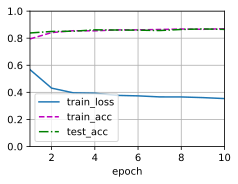

In [3]:
# 训练
# 可以看出训练集和测试集表现差不多，Dropout很好地抑制了过拟合
lr, num_epochs = 0.01, 10
d2l.train_image_classifier(net, train_iter, test_iter, lr, num_epochs)

```{warning}
一般只Dropout隐藏层<br/>
只在训练时Dropout，预测时会使用完整信息
```